In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
df= pd.read_csv("D:\internship works\cognifyztech\Dataset .csv")

In [23]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

LEVEL 1 

Top Cuisines 

Task 1: A. Determine the top three most common cuisines in the dataset

In [25]:
cusine_counts=(
               df['Cuisines']
               .dropna()#removing missing value
               .str.split(',')#split multiple cuisines
               .explode()#expand into separate rows
               .str.strip()#remove extra spaces
               .value_counts()#count accurences
)

#
top_cuisines = cusine_counts.head(3).reset_index()
top_cuisines.columns =['Cuisine','Restaurant Count']
top_cuisines

,Cuisine,Restaurant Count
0,North Indian,3960
1,Chinese,2735
2,Fast Food,1986


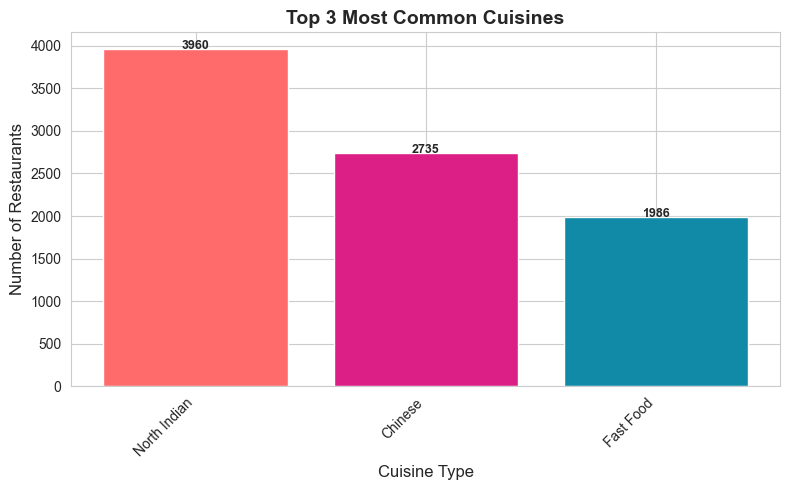

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))


color_palette = ['#FF6B6B', "#DC1F87", "#118AA8"]

plt.bar(top_cuisines['Cuisine'], top_cuisines['Restaurant Count'], color=color_palette)
plt.xticks(rotation=45, ha='right')
plt.title("Top 3 Most Common Cuisines", fontsize=14, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)


for i, val in enumerate(top_cuisines['Restaurant Count']):
    plt.text(i, val + 2, str(val), ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Task 1: B.Calculate the percentage of restaurants that serve each of the top cuisines.

In [27]:
total_restaurants = len(df)
top_cuisines['Percentage']= (top_cuisines['Restaurant Count']/ total_restaurants*100).round(2)
top_cuisines['Percentage']

0    41.46
1    28.64
2    20.79
Name: Percentage, dtype: float64

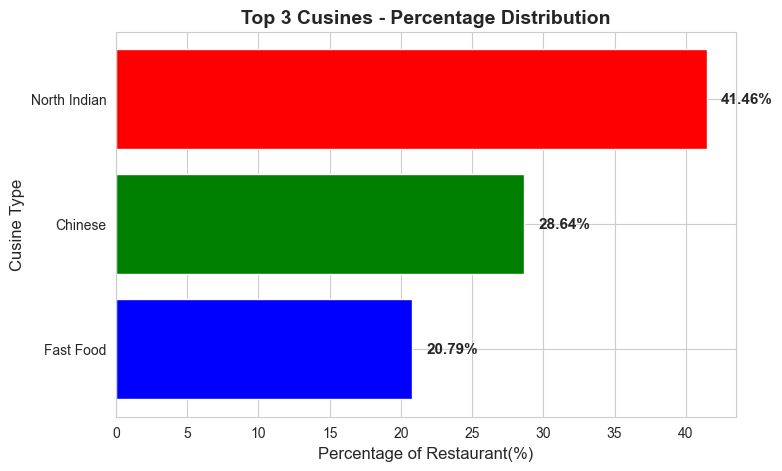

In [28]:
plt.figure(figsize=(8,5))
colors=['r','g','b']
plt.barh(top_cuisines['Cuisine'],top_cuisines['Percentage'],color=colors)
plt.xlabel("Percentage of Restaurant(%)", fontsize = 12)
plt.ylabel("Cusine Type",fontsize=12)
plt.title("Top 3 Cusines - Percentage Distribution", fontsize=14, fontweight='bold')

for i , pct in enumerate(top_cuisines['Percentage']):
    plt.text(pct +1, i, f"{pct}%",va='center',fontsize=11,fontweight='bold')
    
plt.gca().invert_yaxis()
plt.show()

 City Analysis

Task 2 : A.Identify the city with the highest number of restaurants in the dataset. 

In [29]:
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()
top_city_count = city_counts.max()
print(f"The city with the most retaurant is \033[1m{top_city}({top_city_count} restaurant)\033[0m.")

The city with the most retaurant is New Delhi(5473 restaurant).


Task 2 : B.Calculate the average rating for restaurants in each city.

In [30]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().round(2).head()
city_avg_rating

City
Abu Dhabi    4.30
Agra         3.96
Ahmedabad    4.16
Albany       3.56
Allahabad    3.40
Name: Aggregate rating, dtype: float64

Task 2: C. Determine the city with the highest average rating.

In [31]:
top_rated_city =city_avg_rating.idxmax()
top_avg_rating = city_avg_rating.max()
print(f"The city with the nhighest average rating is \033[1m{top_rated_city}({top_avg_rating} average rating\033[0m.")

The city with the nhighest average rating is Abu Dhabi(4.3 average rating.


 Price Range Distribution

Task 3: A.Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20232\4249065318.py:7: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=price_range_counts.index , y=price_range_counts.values , hue=price_range_counts.index, palette = colors , legend=False)


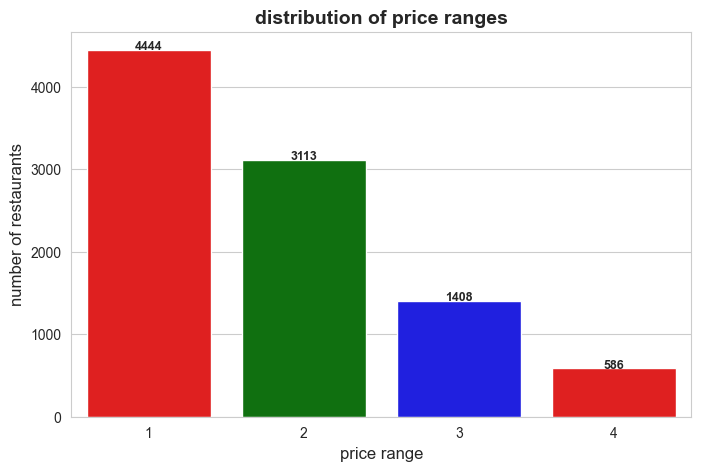

In [32]:
price_range_counts = df['Price range'].value_counts().sort_index()

sns.set_style("whitegrid")
colors=['r','g','b']

plt.figure(figsize=(8,5))
sns.barplot(x=price_range_counts.index , y=price_range_counts.values , hue=price_range_counts.index, palette = colors , legend=False)

plt.xlabel("price range",fontsize=12)
plt.ylabel("number of restaurants", fontsize = 12)
plt.title("distribution of price ranges", fontsize = 14 , fontweight='bold')

for i , val in enumerate(price_range_counts):
    plt.text(i,val +5, str(val),ha='center',fontsize = 9, fontweight='bold')
             
plt.show()

Task 3: B.Calculate the percentage of restaurants in each price range category.

In [33]:
total_restaurants= len(df)
price_range_percentages=(price_range_counts/total_restaurants *100).round(2)

print("percentage of restauant in easch price range :\n")
for price , percent in price_range_percentages.items():
    print(f"price rnge {price};{percent}%")

percentage of restauant in easch price range :

price rnge 1;46.53%
price rnge 2;32.59%
price rnge 3;14.74%
price rnge 4;6.14%


Percentage of Restaurant in each price range
Price Range 1:46.53%
Price Range 2:32.59%
Price Range 3:14.74%
Price Range 4:6.14%


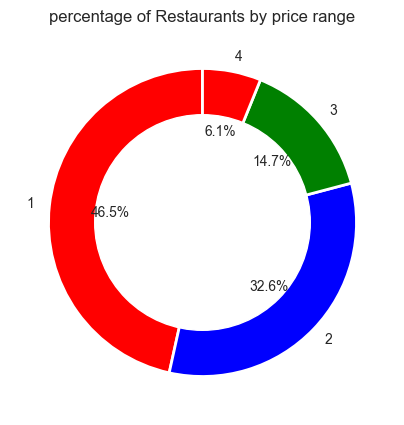

In [34]:
print("Percentage of Restaurant in each price range")
for price , percent in price_range_percentages.items():
    print(f"Price Range {price}:{percent}%")
    
colors =['r','b','g']

plt.figure(figsize=(5,5))
plt.pie(price_range_percentages, labels=price_range_percentages.index, autopct='%1.1f%%',colors=colors,startangle=90, wedgeprops={'edgecolor':'white','linewidth':2,'antialiased':True})

center_circle= plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(center_circle)

plt.title('percentage of Restaurants by price range')
plt.show()

Online Delivery

Task 4 : A.Determine the percentage of restaurants that offer online delivery.

In [35]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [36]:
df['Has Online delivery']= df['Has Online delivery'].str.lower()
total_restaurants=len(df)
online_delivery_count =(df['Has Online delivery']=='yes').sum()
online_delivery_percentage = (online_delivery_count/total_restaurants)*100
print(f"percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

percentage of restaurants offering online delivery: 25.66%


Task 4 : B.Compare the average ratings of restaurants  with and without online delivery.

In [37]:
if 'Aggregate rating' in df.columns:
    avg_rating_with_delivery =df[df['Has Online delivery']=='yes']['Aggregate rating'].mean()
    avg_rating_without_delivery = df[df['Has Online delivery']=='no']['Aggregate rating'].mean()
else:
    avg_rating_with_delivery=avg_rating_without_delivery ="rating column not found"
    
print(f"Average rating of resturants with online delivery: {avg_rating_with_delivery.round(2)}")
print(f"Average rating of restaurants without online delivery : {avg_rating_without_delivery.round(2)}")    

Average rating of resturants with online delivery: 3.25
Average rating of restaurants without online delivery : 2.47
